In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources (only once)
# nltk.download('punkt')
# nltk.download('stopwords')

import json
import wordcloud

## Getting from the jsonl file

In [4]:
# src = "D:\Tech\MachineLearning\SelfStudy\Libraries\src\clickbait17-train-170331\instances.jsonl"
target_src = "D:\Tech\MachineLearning\SelfStudy\Libraries\src\clickbait17-test-170720\clickbait17-test-170720\instances.jsonl"
data = []
with open(target_src,encoding="utf8") as f:
    cnt = 0
    for line in f:
        data.append(json.loads(line))


<>:2: SyntaxWarning: invalid escape sequence '\T'
<>:2: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Asutosh\AppData\Local\Temp\ipykernel_21236\852818608.py:2: SyntaxWarning: invalid escape sequence '\T'
  target_src = "D:\Tech\MachineLearning\SelfStudy\Libraries\src\clickbait17-test-170720\clickbait17-test-170720\instances.jsonl"


In [6]:
src = "D:\Tech\MachineLearning\SelfStudy\Libraries\src\clickbait17-test-170720\clickbait17-test-170720\truth.jsonl"
data = []
with open(src,encoding="utf8") as f:
    cnt = 0
    for line in f:
        data.append(json.loads(line))

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Asutosh\AppData\Local\Temp\ipykernel_21236\4259141571.py:1: SyntaxWarning: invalid escape sequence '\T'
  src = "D:\Tech\MachineLearning\SelfStudy\Libraries\src\clickbait17-test-170720\clickbait17-test-170720\truth.jsonl"
C:\Users\Asutosh\AppData\Local\Temp\ipykernel_21236\4259141571.py:1: SyntaxWarning: invalid escape sequence '\T'
  src = "D:\Tech\MachineLearning\SelfStudy\Libraries\src\clickbait17-test-170720\clickbait17-test-170720\truth.jsonl"


OSError: [Errno 22] Invalid argument: 'D:\\Tech\\MachineLearning\\SelfStudy\\Libraries\\src\\clickbait17-test-170720\\clickbait17-test-170720\truth.jsonl'

In [ ]:
df = pd.DataFrame(data)
df = df.drop(['postTimestamp','postMedia'],axis=1)

In [ ]:
targetTitle = df['targetTitle']
targetId = df['id']
corpus = list(targetTitle)

In [ ]:
# print(corpus)

In [ ]:
df.head()

## Removing any special chars or punctuations

In [ ]:
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]   
    return filtered_tokens

documents = []
for ini_string in corpus:
    getVals = list([val if val.isalnum() else " " for val in ini_string ])
    result = "".join(getVals)
    documents.append(result)

vocab = list()
for sentence in documents:
    # vocab.extend(nltk.tokenize.word_tokenize(sentence))
    vocab.extend(tokenize_and_remove_stopwords(sentence))

In [ ]:
# documents

In [ ]:
# Convert the list to a pandas DataFrame
words = pd.DataFrame(vocab, columns=['Words'])

# Group by 'Values' and count occurrences
value_counts = words.groupby('Words').size().reset_index(name='Count')

# Sort the counts in descending order
value_counts = value_counts.sort_values(by='Count', ascending=False)

# Display the table of counts
print(value_counts)

In [ ]:
print(len(vocab))
print(len(set(vocab)))

## Visualising data using wordcloud

In [ ]:
# Start with one review:
from wordcloud import WordCloud
text = " ".join(vocab)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

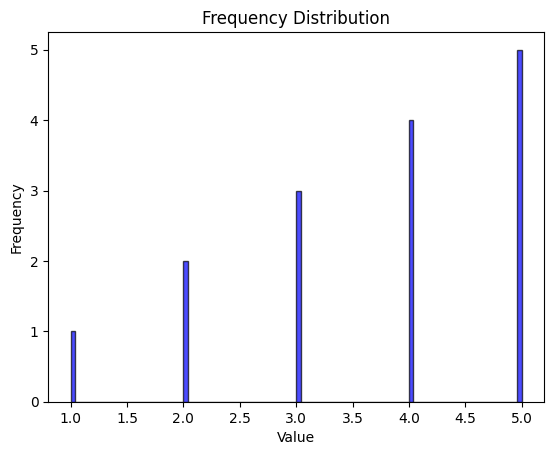

In [9]:
# Example data
data = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5]

# Create the histogram
plt.hist(data, bins=100, color='blue', edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Frequency Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()